# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
# 02 - Getting Data
# Read the .csv file
import pandas as pd
customer_data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
customer_data

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# 03 - Cleaning/Wrangling/EDA
# Change header names
customer_data.rename(columns = {'Customer':'customer_id','ST':'state'}, inplace = True) 
customer_data.columns = customer_data.columns.str.lower().str.strip()
customer_data.columns = customer_data.columns.str.replace(" ","_").str.strip()
customer_data.head()

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [3]:
# Deal with NaN values
customer_data.dropna(axis=0, how = 'all',inplace=True)

In [4]:
#Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
# Displaying Categorical Features
for cols in customer_data.columns:
    if customer_data[cols].nunique() < 10:
        unique_Of_each = customer_data[cols].unique()
        print(f"Uniques values of {cols} column is : {unique_Of_each}")

Uniques values of state column is : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA']
Uniques values of gender column is : [nan 'F' 'M' 'Femal' 'Male' 'female']
Uniques values of education column is : ['Master' 'Bachelor' 'High School or Below' 'College' 'Bachelors' 'Doctor']
Uniques values of number_of_open_complaints column is : ['1/0/00' '1/2/00' '1/1/00' '1/3/00' '1/5/00' '1/4/00']
Uniques values of policy_type column is : ['Personal Auto' 'Corporate Auto' 'Special Auto']
Uniques values of vehicle_class column is : ['Four-Door Car' 'Two-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


In [6]:
def mod_upper(q):
    if isinstance(q,str):
        return q.upper()
    else:
        return q
def clean(x):
    if str(x) in ['M', 'MALE']:
        return 'M'
    elif str(x).startswith('F'):
        return 'F'
customer_data['gender'] =list(map(mod_upper,customer_data['gender']))
customer_data['gender'] = list(map(clean, customer_data['gender']))
customer_data['gender'].unique()

array([None, 'F', 'M'], dtype=object)

In [7]:
# Dealing with Categorical Features
#"AZ": "Arizona", "Cali": "California", "WA": "Washington"
display(customer_data['state'].unique())
def switch(st):
    if st == "AZ":
        return "Arizona"
    elif st == "Cali":
        return "California"
    elif st == "WA":
        return "Washington"
    else:
        return st
 
customer_data['state'] = list(map(switch,customer_data['state']))
customer_data['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA'], dtype=object)

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [8]:
#In education, "Bachelors" could be replaced by "Bachelor"
customer_data['education'] = list(map(lambda ed : str(ed).replace("Bachelors","Bachelor"),customer_data['education']))
customer_data['education'].value_counts()

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

In [9]:
#In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"
#customer_data['vehicle_class'] = list(map(lambda ed : str(ed).replace("Bachelors","Bachelor"),customer_data['vehicle_class']))
def switch1(vh):
    if vh in ["Sports Car","Luxury SUV","Luxury Car"]:
        return "Luxury"
    else:
        return vh
customer_data['vehicle_class'] = list(map(switch1,customer_data['vehicle_class']))
customer_data['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [10]:
# Formatting the data types 
# Customer lifetime value should be numeric
customer_data['customer_lifetime_value'].value_counts(dropna=False)
customer_data['customer_lifetime_value'] = customer_data['customer_lifetime_value'].fillna("0")
customer_data['customer_lifetime_value'] = list(map(lambda x : x.replace("%", " "),customer_data['customer_lifetime_value']))
customer_data['customer_lifetime_value'] = customer_data['customer_lifetime_value'].astype(float)
customer_data['customer_lifetime_value']

0             0.00
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
1066     305955.03
1067    2031499.76
1068     323912.47
1069     462680.11
1070     899704.02
Name: customer_lifetime_value, Length: 1071, dtype: float64

In [11]:
# Dealing of Number of open complaints having an incorrect format. 
display(customer_data['number_of_open_complaints'].value_counts(dropna = False))
customer_data['number_of_open_complaints'] = customer_data['number_of_open_complaints'].fillna('0/0')
customer_data['number_of_open_complaints'] = list(map(lambda y : y.split('/')[1],customer_data['number_of_open_complaints'] ))
customer_data['number_of_open_complaints'] = customer_data['number_of_open_complaints'].astype(int)
customer_data['number_of_open_complaints'] 

number_of_open_complaints
1/0/00    830
1/1/00    138
1/2/00     50
1/3/00     34
1/4/00     13
1/5/00      6
Name: count, dtype: int64

0       0
1       0
2       0
3       0
4       0
       ..
1066    1
1067    2
1068    0
1069    0
1070    0
Name: number_of_open_complaints, Length: 1071, dtype: int32

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [12]:
customer_data

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,None,Master,0.00,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,0,Special Auto,SUV,547.200000


In [13]:
customer_data.isnull().sum()

customer_id                    0
state                          0
gender                       117
education                      0
customer_lifetime_value        0
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

In [14]:
# Dealing with NaN values
customer_data['gender'].value_counts(dropna=False)
customer_data['gender'] = list(map(lambda g : str(g).replace("None","U"),customer_data['gender']))

In [15]:
customer_data['gender'].value_counts(dropna = False)

gender
F    502
M    452
U    117
Name: count, dtype: int64

In [16]:
customer_data.isnull().sum()

customer_id                  0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [17]:
# Save the cleaned dataset to a new CSV file.
customer_data.to_csv('clean_customer_data_ver0.csv',index=False)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [18]:
# Your code here
customer_data2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [19]:
# Your code here

# -----------------------------------------------------------------------------------------

# customer-analysis-round-3-eda-using-graphs

* Show DataFrame info.
* Describe DataFrame.
* Show a plot of the Gender breakdown.
* Show a plot of Income by State.
* Show a plot of the Policy Type by the Total Claim Amount.
* Show a plot of the Education by Vehicle Class.
* What insights can you establish from these plots?
* What other plots do you feel would be beneficial?

In [20]:
# Show DataFrame info.
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                1071 non-null   object 
 1   state                      1071 non-null   object 
 2   gender                     1071 non-null   object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1071 non-null   float64
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   int32  
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(4), int32(1), object(6)
memory usage: 96.2+ KB


In [21]:
# Describe DataFrame.
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,791467.037330,643944.708436,0.000000,401975.275000,584932.150000,894520.995,5.816655e+06
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.000,9.996000e+04
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.500,3.535400e+04
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.000,5.000000e+00
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.800,2.893240e+03


In [22]:
# Show a plot of the Gender breakdown.
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [23]:
customer_data['gender'].value_counts(dropna = False)

gender
F    502
M    452
U    117
Name: count, dtype: int64

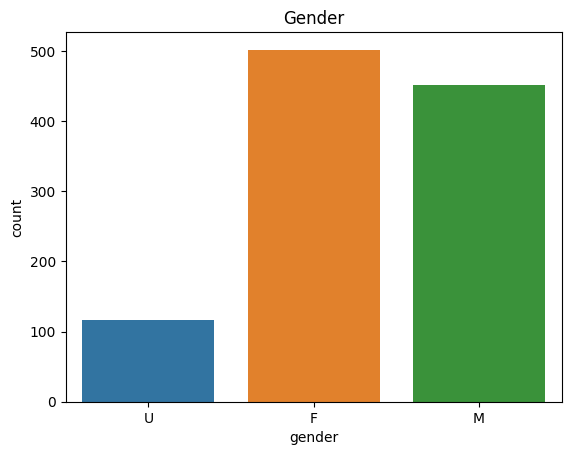

In [24]:
# Exploration 
sns.countplot(x= "gender",data = customer_data,hue= "gender")
plt.title("Gender")
plt.show()

*The Female has highest*

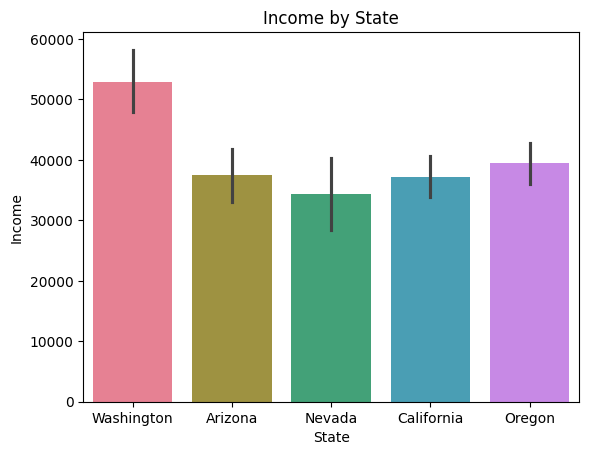

In [25]:
# Show a plot of Income by State.
sns.barplot(x= "state",y="income",data = customer_data,palette='husl',hue = "state")
plt.title("Income by State")
plt.xlabel("State")
plt.ylabel("Income")
plt.show()

*The Washington state has higher income*

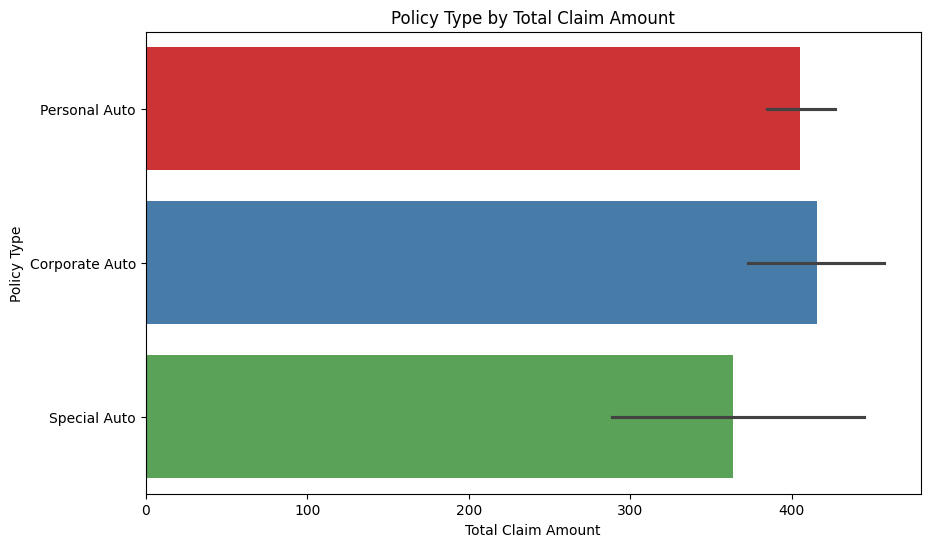

In [26]:
# Show a plot of the Policy Type by the Total Claim Amount.
plt.figure(figsize=(10, 6))
sns.barplot(x="total_claim_amount",y="policy_type",data = customer_data,palette='Set1',hue = "policy_type")
plt.title("Policy Type by Total Claim Amount")
plt.xlabel("Total Claim Amount")
plt.ylabel("Policy Type")
plt.show()

*Corporate Auto Policy has the highest Claim Amount*

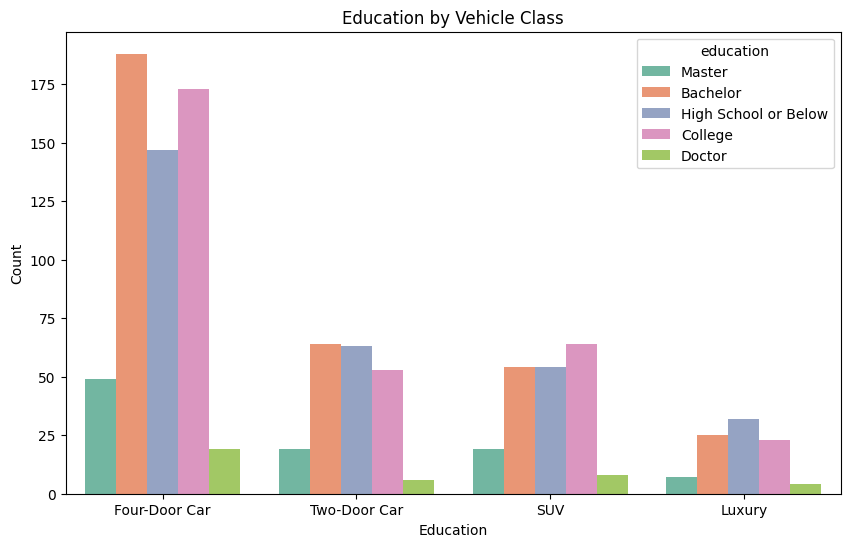

In [27]:
# Show a plot of the Education by Vehicle Class.
plt.figure(figsize=(10, 6))
sns.countplot(x="vehicle_class",hue="education",data = customer_data,palette='Set2')
plt.title("Education by Vehicle Class")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

# -------------------------------------------------------------------------------

# Lab | Customer Analysis Round 4


In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the same data file that you have used in the previous lab (round 3). You can continue using the same Jupyter notebook.

Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)


You do NOT need to fork and clone this lab.
Complete the following task

Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)

Now we will try to check the normality of the numerical variables visually

Use seaborn library to construct distribution plots for the numerical variables

Use Matplotlib to construct histograms

Do the distributions for different numerical variables look like a normal distribution?

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn 
heatmap. If there is no pair of features that have a high correlation, then do not drop any features


In [28]:
# Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)
import numpy as np
numeric = customer_data.select_dtypes(include = np.number)
categoric= customer_data.select_dtypes(include = object)
display(numeric)
display(categoric)

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,0.00,0.0,1000.0,0,2.704934
1,697953.59,0.0,94.0,0,1131.464935
2,1288743.17,48767.0,108.0,0,566.472247
3,764586.18,0.0,106.0,0,529.881344
4,536307.65,36357.0,68.0,0,17.269323
...,...,...,...,...,...
1066,305955.03,38644.0,78.0,1,361.455219
1067,2031499.76,63209.0,102.0,2,207.320041
1068,323912.47,16061.0,88.0,0,633.600000
1069,462680.11,79487.0,114.0,0,547.200000


,customer_id,state,gender,education,policy_type,vehicle_class
0,RB50392,Washington,U,Master,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,Special Auto,SUV


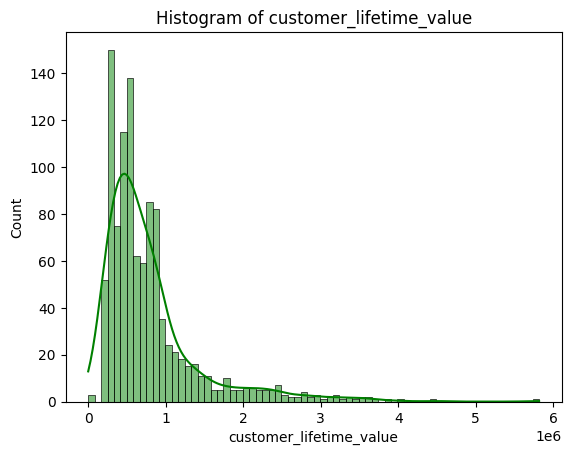

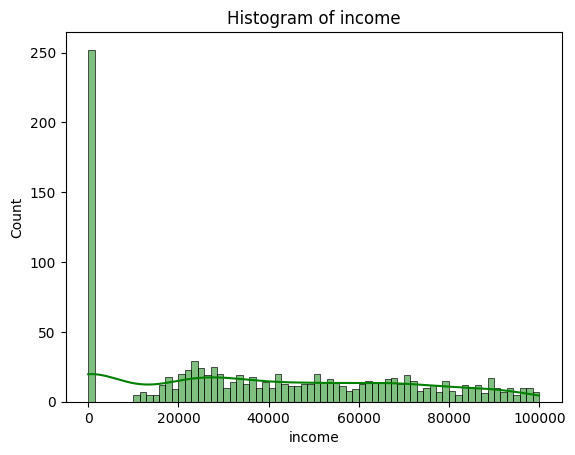

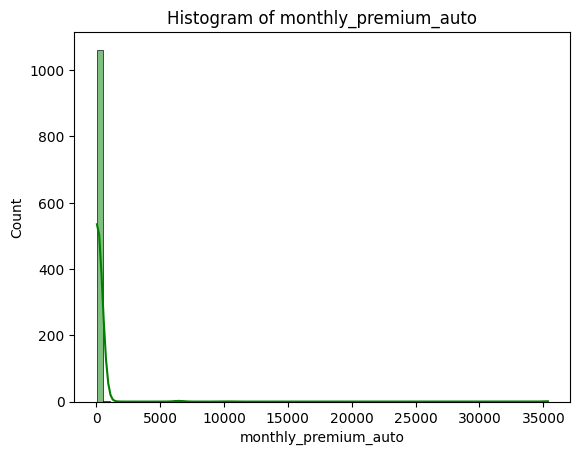

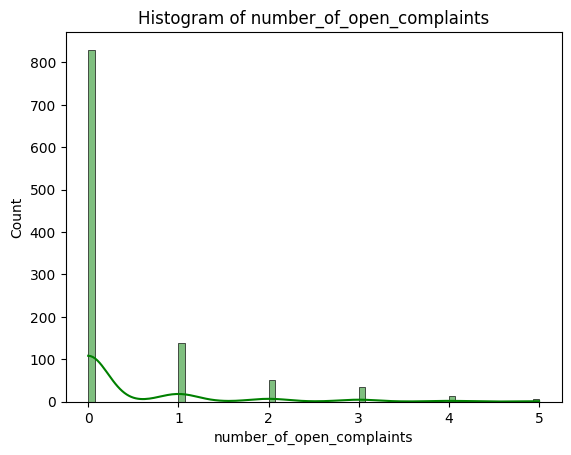

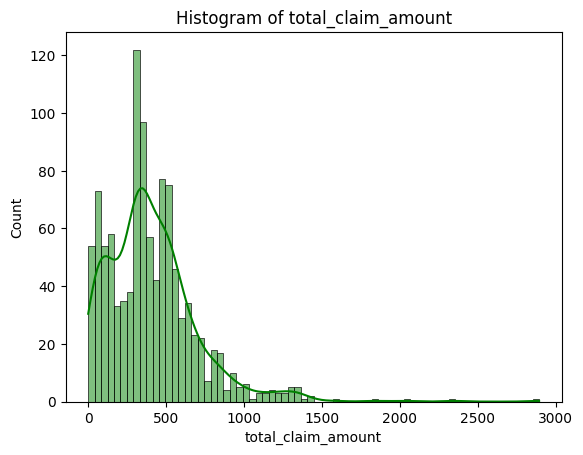

In [29]:
# Use seaborn library to construct distribution plots for the numerical variables
# Use Matplotlib to construct histograms
for col in numeric.columns:
    sns.histplot(numeric[col],kde= True,bins=70,color = "green")
    plt.title(f"Histogram of {col}")
    plt.show()

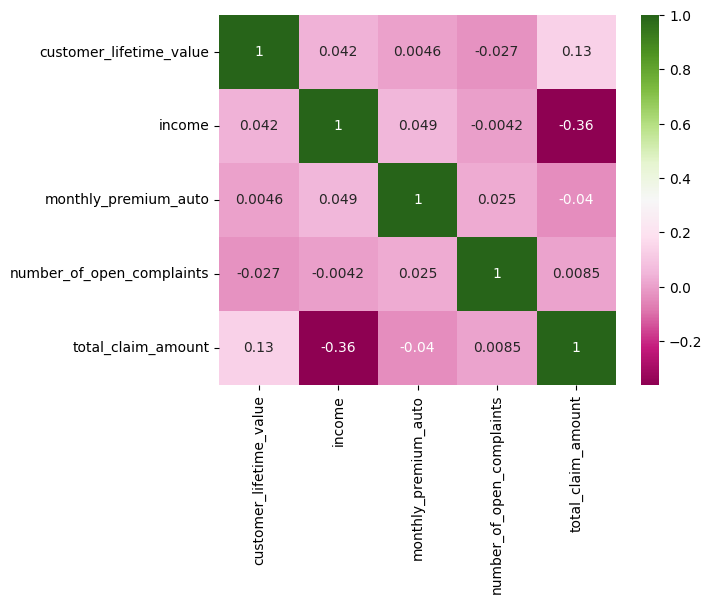

In [30]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
correlations_matrix = numeric.corr()
sns.heatmap(correlations_matrix, annot=True,cmap="PiYG")
plt.show()

In [31]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.042318,0.004599,-0.026547,0.134880
income,0.042318,1.000000,0.049100,-0.004161,-0.361282
monthly_premium_auto,0.004599,0.049100,1.000000,0.025138,-0.040493
number_of_open_complaints,-0.026547,-0.004161,0.025138,1.000000,0.008470
total_claim_amount,0.134880,-0.361282,-0.040493,0.008470,1.000000


In [32]:
customer_data

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,0.00,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,0,Special Auto,SUV,547.200000


In [33]:
customer_data = customer_data.drop(['number_of_open_complaints'],axis=1)

In [34]:
customer_data

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,0.00,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,Special Auto,SUV,547.200000


# -----------------------------------------------------------------------------------------

# Lab | Customer Analysis Round 5

Get the data
For this lab, we continue using the csv file that that was previously downloaded and the same Jupyter notebook from the previous rounds. There is NO NEED to fork and clone this repository.

Dealing with the data
Already done in the round 2.

Explore the data
Done in the round 3.

Processing Data
(Further processing...)

X-y split. Remember that at this time yoou need the complete dataset, both numerical and categorical in the X features.

X split into X_numerical and X_categorical

Scaling (X_numerical).

In [35]:
# 04 - Processing Data
# X-y split. Remember that at this time yoou need the complete dataset, both numerical and categorical in the X features.
y = customer_data['total_claim_amount']
X = customer_data.drop(['total_claim_amount'], axis=1)
display(X)
display(y)

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class
0,RB50392,Washington,U,Master,0.00,0.0,1000.0,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,Personal Auto,Four-Door Car
...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,Special Auto,SUV


0          2.704934
1       1131.464935
2        566.472247
3        529.881344
4         17.269323
           ...     
1066     361.455219
1067     207.320041
1068     633.600000
1069     547.200000
1070     537.600000
Name: total_claim_amount, Length: 1071, dtype: float64

In [36]:
# X split into X_numerical and X_categorical
X_numerical = customer_data._get_numeric_data().copy()
X_categorical = customer_data.select_dtypes(include = "object")

In [37]:
display(X_numerical,X_categorical)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,0.00,0.0,1000.0,2.704934
1,697953.59,0.0,94.0,1131.464935
2,1288743.17,48767.0,108.0,566.472247
3,764586.18,0.0,106.0,529.881344
4,536307.65,36357.0,68.0,17.269323
...,...,...,...,...
1066,305955.03,38644.0,78.0,361.455219
1067,2031499.76,63209.0,102.0,207.320041
1068,323912.47,16061.0,88.0,633.600000
1069,462680.11,79487.0,114.0,547.200000


,customer_id,state,gender,education,policy_type,vehicle_class
0,RB50392,Washington,U,Master,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,Special Auto,SUV


In [38]:
X_numerical['lifetimeOverIncome'] = X_numerical['customer_lifetime_value']/X_numerical['income']
X_numerical['incomeOverPremium'] = X_numerical['income']/X_numerical['monthly_premium_auto']
X_numerical.replace([np.nan, np.inf, -np.inf], 0, inplace = True)
X_numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,lifetimeOverIncome,incomeOverPremium
0,0.00,0.0,1000.0,2.704934,0.000000,0.000000
1,697953.59,0.0,94.0,1131.464935,0.000000,0.000000
2,1288743.17,48767.0,108.0,566.472247,26.426542,451.546296
3,764586.18,0.0,106.0,529.881344,0.000000,0.000000
4,536307.65,36357.0,68.0,17.269323,14.751152,534.661765


In [39]:
# Normalization
# Scaling X_numerical using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
transformer1 = MinMaxScaler().fit(X_numerical)
x_normalized1 = transformer1.transform(X_numerical)
print(x_normalized1.shape)
x_normalized1
df_MinMaxScalar = pd.DataFrame(x_normalized1, columns=X_numerical.columns)
df_MinMaxScalar

(1071, 6)


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,lifetimeOverIncome,incomeOverPremium
0,0.000000,0.000000,0.026606,0.000803,0.000000,0.000000
1,0.119992,0.000000,0.000935,0.390992,0.000000,0.000000
2,0.221561,0.487865,0.001332,0.195685,0.129646,0.281110
3,0.131448,0.000000,0.001275,0.183037,0.000000,0.000000
4,0.092202,0.363715,0.000198,0.005838,0.072368,0.332854
...,...,...,...,...,...,...
1066,0.052600,0.386595,0.000482,0.124815,0.038841,0.308434
1067,0.349256,0.632343,0.001162,0.071534,0.157673,0.385792
1068,0.055687,0.160674,0.000765,0.218890,0.098941,0.113623
1069,0.079544,0.795188,0.001502,0.189023,0.028556,0.434076


In [40]:
# Scaling X_numerical using MinMaxScaler
# transformer2 = StandardScaler().fit(X_numerical)
# x_standardized2 = transformer2.transform(X_numerical)
# print(x_standardized2.shape)
# df_standardScale = pd.DataFrame(x_standardized2, columns=X_numerical.columns)
# df_standardScale

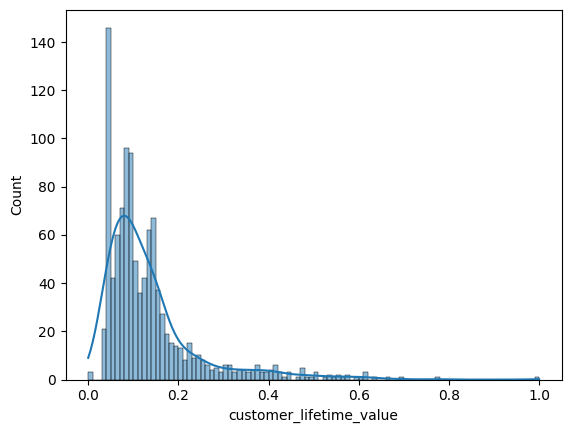

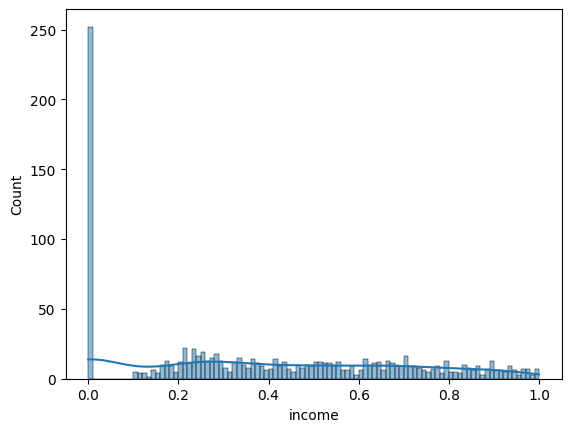

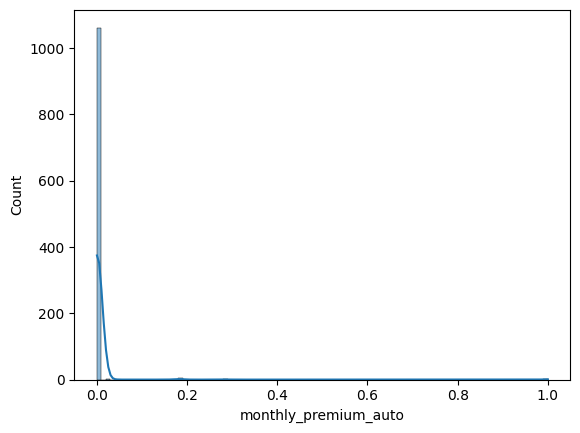

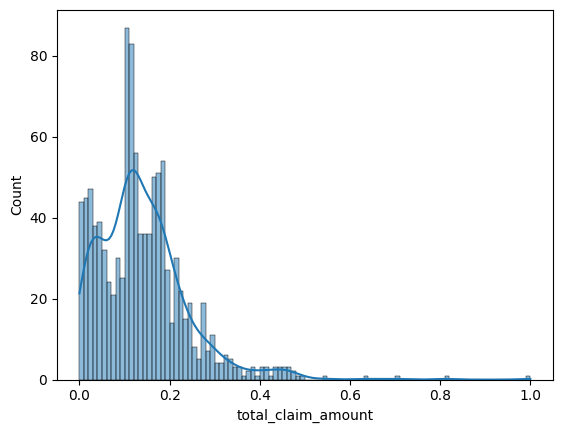

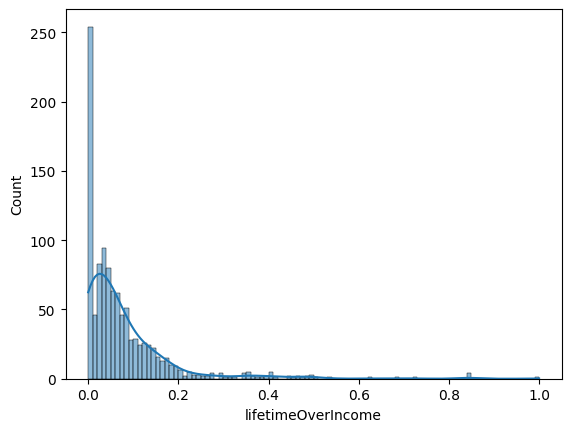

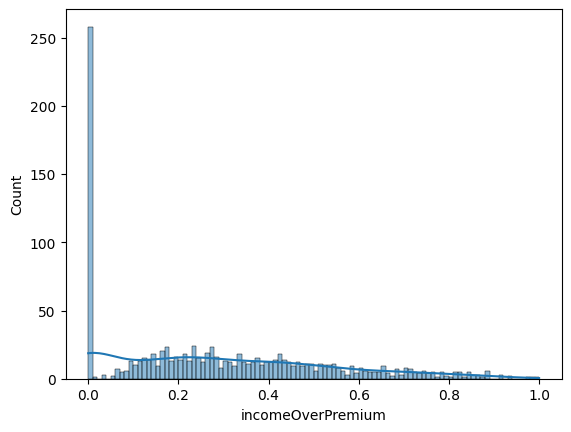

In [41]:
for col in X_numerical.columns:
    sns.histplot(x = df_MinMaxScalar[col],kde=True,bins=100)
    plt.show()

In [42]:
# for col in X_numerical.columns:
#     sns.histplot(x = df_standardScale[col],kde=True,bins=100)
#     plt.show()

# ---------------------------------------------------------------------------------------

# Lab | Customer Analysis Round 6

Get the data
For this lab, we continue using the customer data file that has been used in the previous labs.
There is NO NEED to fork and clone this repository.

Dealing with the data
Already done.

Explore the data
Already done.

Processing Data
(Further processing...)

X-y split. (done) Round 5
Scaling (numerical). (done) Round 5
Round 6

One Hot/Label Encoding (categorical).

Concat DataFrames

Linear Regression

Train-test split.

Apply linear regression.

Model Validation

Description:

R2.

MSE.

RMSE.

MAE.


In [43]:
from sklearn import linear_model

In [44]:
new_X_categorical = X_categorical.drop("customer_id",axis = 1)
new_X_categorical

,state,gender,education,policy_type,vehicle_class
0,Washington,U,Master,Personal Auto,Four-Door Car
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...
1066,Oregon,M,Master,Personal Auto,Four-Door Car
1067,California,F,High School or Below,Personal Auto,SUV
1068,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,California,F,Master,Special Auto,SUV


In [45]:
for cat_col in new_X_categorical.columns:
    display(new_X_categorical[cat_col].value_counts())
    print(" ")

state
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

gender
F    502
M    452
U    117
Name: count, dtype: int64

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

policy_type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

In [46]:
drop_education = new_X_categorical.loc[:,new_X_categorical.columns!= 'education']
drop_education

,state,gender,policy_type,vehicle_class
0,Washington,U,Personal Auto,Four-Door Car
1,Arizona,F,Personal Auto,Four-Door Car
2,Nevada,F,Personal Auto,Two-Door Car
3,California,M,Corporate Auto,SUV
4,Washington,M,Personal Auto,Four-Door Car
...,...,...,...,...
1066,Oregon,M,Personal Auto,Four-Door Car
1067,California,F,Personal Auto,SUV
1068,Arizona,F,Personal Auto,Four-Door Car
1069,California,F,Special Auto,SUV


In [47]:
# Encoding Categorical Data
#one hot encoding is a way to turn categorical variables into multiple numerical columns
# Here I am choosing state,gender,policy_type,vehicle_class
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first")
encoded = encoder.fit_transform(drop_education)
onehot_encoded = pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out(drop_education.columns))
onehot_encoded.head()


,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
new_X_categorical

,state,gender,education,policy_type,vehicle_class
0,Washington,U,Master,Personal Auto,Four-Door Car
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...
1066,Oregon,M,Master,Personal Auto,Four-Door Car
1067,California,F,High School or Below,Personal Auto,SUV
1068,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,California,F,Master,Special Auto,SUV


In [49]:
#label encoding keeps just one column and makes it numerical
# Here I am choosing education for label encoding because it is in order
keep_education = new_X_categorical.loc[:,['education']]
keep_education

,education
0,Master
1,Bachelor
2,Bachelor
3,Bachelor
4,High School or Below
...,...
1066,Master
1067,High School or Below
1068,Bachelor
1069,Master


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
for col in keep_education:
    keep_education[col] = pd.DataFrame(label_encode.fit_transform(keep_education[col]))
keep_education

,education
0,4
1,0
2,0
3,0
4,3
...,...
1066,4
1067,3
1068,0
1069,4


In [51]:
X = pd.concat([df_MinMaxScalar, onehot_encoded,keep_education], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,lifetimeOverIncome,incomeOverPremium,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,education
0,0.000000,0.000000,0.026606,0.000803,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1,0.119992,0.000000,0.000935,0.390992,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.221561,0.487865,0.001332,0.195685,0.129646,0.281110,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.131448,0.000000,0.001275,0.183037,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.092202,0.363715,0.000198,0.005838,0.072368,0.332854,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.052600,0.386595,0.000482,0.124815,0.038841,0.308434,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1067,0.349256,0.632343,0.001162,0.071534,0.157673,0.385792,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
1068,0.055687,0.160674,0.000765,0.218890,0.098941,0.113623,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1069,0.079544,0.795188,0.001502,0.189023,0.028556,0.434076,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4


In [52]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
correlations_matrix = X.corr()
# sns.heatmap(correlations_matrix, annot=True,cmap="PiYG")
# plt.show()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,lifetimeOverIncome,incomeOverPremium,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,education
customer_lifetime_value,1.000000,0.042318,0.004599,0.134880,0.620223,-0.079459,-0.044725,-0.034978,0.043206,0.007198,-0.016791,-0.004744,0.021378,-0.006037,0.212642,0.181748,-0.064369,-0.025131
income,0.042318,1.000000,0.049100,-0.361282,-0.005382,0.904463,-0.045443,-0.051172,0.003023,0.152181,0.013715,-0.026274,-0.059940,0.051840,-0.036591,-0.008147,0.018902,0.011004
monthly_premium_auto,0.004599,0.049100,1.000000,-0.040493,-0.012163,-0.079689,-0.042162,-0.020026,-0.039652,0.183816,0.003421,-0.020934,-0.007706,-0.015410,-0.006813,-0.020232,-0.025570,0.002406
total_claim_amount,0.134880,-0.361282,-0.040493,1.000000,0.048029,-0.449329,0.061158,0.038024,0.048037,-0.237377,0.076586,0.005409,-0.000930,-0.033449,0.379481,0.198905,-0.100041,-0.035055
lifetimeOverIncome,0.620223,-0.005382,-0.012163,0.048029,1.000000,-0.070001,-0.051401,-0.011769,0.065490,-0.039833,-0.040495,0.060751,0.028654,0.003825,0.122029,0.122362,-0.049409,-0.030392
incomeOverPremium,-0.079459,0.904463,-0.079689,-0.449329,-0.070001,1.000000,-0.038745,-0.050534,0.004056,0.130777,0.012150,-0.010532,-0.051280,0.059057,-0.165827,-0.163604,0.089188,-0.005980
state_California,-0.044725,-0.045443,-0.042162,0.061158,-0.051401,-0.038745,1.000000,-0.212253,-0.436569,-0.227418,0.021709,0.011920,-0.009377,0.003454,-0.022639,0.054534,-0.042920,-0.033683
state_Nevada,-0.034978,-0.051172,-0.020026,0.038024,-0.011769,-0.050534,-0.212253,1.000000,-0.207163,-0.107915,0.023871,-0.017709,-0.039112,0.011315,0.019433,-0.068349,0.026685,0.016084
state_Oregon,0.043206,0.003023,-0.039652,0.048037,0.065490,0.004056,-0.436569,-0.207163,1.000000,-0.221963,-0.029124,0.059128,-0.027758,-0.009367,-0.001387,0.065775,0.014253,-0.036992
state_Washington,0.007198,0.152181,0.183816,-0.237377,-0.039833,0.130777,-0.227418,-0.107915,-0.221963,1.000000,0.025766,-0.089621,0.063078,-0.039679,-0.048685,-0.044300,0.068161,0.043677


In [53]:
X = X.drop(['total_claim_amount'], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,lifetimeOverIncome,incomeOverPremium,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,education
0,0.000000,0.000000,0.026606,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
1,0.119992,0.000000,0.000935,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.221561,0.487865,0.001332,0.129646,0.281110,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.131448,0.000000,0.001275,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.092202,0.363715,0.000198,0.072368,0.332854,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.052600,0.386595,0.000482,0.038841,0.308434,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1067,0.349256,0.632343,0.001162,0.157673,0.385792,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
1068,0.055687,0.160674,0.000765,0.098941,0.113623,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1069,0.079544,0.795188,0.001502,0.028556,0.434076,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4


In [54]:
y = df_MinMaxScalar['total_claim_amount']
y

0       0.000803
1       0.390992
2       0.195685
3       0.183037
4       0.005838
          ...   
1066    0.124815
1067    0.071534
1068    0.218890
1069    0.189023
1070    0.185705
Name: total_claim_amount, Length: 1071, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
target = 0.5
for a in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = a)
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    predictions_test = lm.predict(X_test)
    score = r2_score(y_test, predictions_test)
    if score > target:
        target = a
print("Ideal Random State is:", target)



Ideal Random State is: 741


In [56]:
# Splitting into train set and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 741)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 17)
(215, 17)
(856,)
(215,)


In [58]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,lifetimeOverIncome,incomeOverPremium,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,gender_U,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,education
1046,0.234987,0.000000,0.003853,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
105,0.119771,0.418537,0.000765,0.081693,0.295973,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
763,0.037201,0.000000,0.000057,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
146,0.136313,0.000000,0.000312,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
432,0.075008,0.588655,0.001388,0.036376,0.333019,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [59]:
y_train.head()

1046    0.490179
105     0.048976
763     0.104401
146     0.119335
432     0.182386
Name: total_claim_amount, dtype: float64

In [60]:
# 05 - Modeling
# Aplly model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [61]:
# 06 - Model Validation
# Calculating r2 score 
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.33347415130699176

In [62]:
# 07 - Reporting
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our Claim Amount, not just repeating the values it has seen in the training data
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5041025446828618

In [63]:
y_test[:5]

49     0.108073
27     0.007122
178    0.023436
847    0.114357
280    0.118256
Name: total_claim_amount, dtype: float64

In [64]:
predictions_test[:5]

array([0.16226652, 0.09166696, 0.03385685, 0.08407578, 0.18269147])

In [65]:
# Calculating MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

0.005456652824224265

In [66]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

0.07386916017002133

In [67]:
y_test.mean()

0.13434622585342237

In [68]:
rmse/y_test.mean()

0.5498417220191644

In [69]:
from sklearn.metrics import mean_absolute_error

In [70]:
# caluculating MAE
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

0.05617915673491454
